In [1]:
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
import uproot, os, sys
import awkward as ak
# Get the notebook directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
# Add the project root to sys.path
sys.path.append(os.path.join(notebook_dir, ".."))
from utils.branches import get_branches, truth_branches
from utils.plot import plot_data
from utils.constants import truthJpsiK, trigcut, dataPath, mcCorrPath, mcPath, truthpkk
from matplotlib import rcParams
import matplotlib as mpl
plt.style.use(hep.style.LHCb1)
config = {"mathtext.fontset":'stix'}
rcParams.update(config)

In [2]:
plt.rcParams.update({
    # Keep the font family settings for LHCb style
    "font.family": "serif",
    "font.serif": ["Times", "Computer Modern Roman", "DejaVu Serif"],
    
    # # Increase only the size-related parameters
    # "figure.figsize": (15, 10),  # Larger figure
    # "figure.dpi": 100,          # Screen display
    # "savefig.dpi": 300,         # Saved figure resolution
    
    # # # Increase font sizes while keeping LHCb style
    # "font.size": 12,            # Base font size (increase from default)
    # "axes.titlesize": 12,       # Title size
    # "axes.labelsize": 10,       # Axis label size
    "xtick.labelsize": 14,      # X tick label size
    "ytick.labelsize": 14,      # Y tick label size
    "legend.fontsize": 16       # Legend font size
})


In [3]:
track = "LL"
particles = ["h1", "h2", "p"]

dataPath = "/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced"
# Get the list of files matching the criteria
filelist = [
    f"{dataPath}/{file}:B2L0barPKpKm_{track}/DecayTree"
    for file in os.listdir(dataPath) if file.startswith("dataBu2L0barPHH_")
]
# filelist += [
#     f"{dataPath}/{file}:B2L0PbarKpKp_{track}/DecayTree"
#     for file in os.listdir(dataPath) if file.startswith("Bu2L0barPHH_")
# ]

# Debugging: Print the filelist to check for issues
print("Files being processed:")
for file in filelist:
    print(f"  - {file}")

# Ensure `branches` is properly called with particles
branch_list = get_branches(particles)  # Call the function and get a list

# Debugging: Print branch list to confirm it's correct
print("Branches being read:")
for branch in branch_list:
    print(f"  - {branch}")

# Process the ROOT files with uproot
data = uproot.concatenate(filelist, branch_list, cut=trigcut)

Files being processed:
  - /share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_16MD_reduced.root:B2L0barPKpKm_LL/DecayTree
  - /share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_16MU_reduced.root:B2L0barPKpKm_LL/DecayTree
  - /share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_17MD_reduced.root:B2L0barPKpKm_LL/DecayTree
  - /share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_17MU_reduced.root:B2L0barPKpKm_LL/DecayTree
  - /share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_18MD_reduced.root:B2L0barPKpKm_LL/DecayTree
  - /share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_18MU_reduced.root:B2L0barPKpKm_LL/DecayTree
Branches being read:
  - h1_P
  - h1_PT
  - h1_PE
  - h1_PX
  - h1_PY
  - h1_PZ
  - h1_ID
  - h1_TRACK_Type
  - h1_IPCHI2_OWNPV
  - h2_P
  - h2_PT
  - h2_PE
  - h2_PX
  - h2_PY
  - h2_PZ
  - h2_ID
  - h2_TRACK_Type
  - h2_IPCHI2_OWNP

In [4]:
# filelist = {}  # Ensure filelist is a dictionary
# branches = get_branches(particles)
# filelist["mc"] = [ f"{mcPath}/MC1*M*Bu2L0barPKpKm.root:B2L0barPKpKm_{track}/DecayTree"]
# mc = uproot.concatenate(filelist["mc"],  branches, cut=trigcut+truthpkk)

In [5]:
## K+ in B+ --> Lambda_bar,p,K+,K-

h1_P   = data['h1_P']
h1_PT  = data['h1_PT']
h1_PE  = data['h1_PE']
h1_PX  = data['h1_PX']
h1_PY  = data['h1_PY']
h1_PZ  = data['h1_PZ']
h1_ID  = data["h1_ID"]
# h1_PIDK       = data['h1_PIDK']
# h1_PIDp       = data['h1_PIDp']
h1_TRACK_Type = data["h1_TRACK_Type"]
h1_IPCHI2_OWNPV = data['h1_IPCHI2_OWNPV']   

## K- in B+ --> Lambda_bar,p,K+,K-

h2_P   = data['h2_P']
h2_PT  = data['h2_PT']
h2_PE  = data['h2_PE']
h2_PX  = data['h2_PX']
h2_PY  = data['h2_PY']
h2_PZ  = data['h2_PZ']
h2_ID  = data["h2_ID"]
# h2_PIDK       = data['h2_PIDK']
# h2_PIDp       = data['h2_PIDp']
h2_TRACK_Type = data["h2_TRACK_Type"]
h2_IPCHI2_OWNPV = data['h2_IPCHI2_OWNPV']

## p in B+ --> Lambda_bar,p,K+,K-

p_P   = data['p_P']
p_PT  = data['p_PT']
p_PE  = data['p_PE']
p_PX  = data['p_PX']
p_PY  = data['p_PY']
p_PZ  = data['p_PZ']
p_ID  = data["p_ID"]
# p_PIDK       = data['p_PIDK']
# p_PIDp       = data['p_PIDp']
p_TRACK_Type = data["p_TRACK_Type"]
p_ProbNNp    = data['p_ProbNNp']
p_IPCHI2_OWNPV = data['p_IPCHI2_OWNPV']
p_MC15TuneV1_ProbNNp = data['p_MC15TuneV1_ProbNNp']

## proton in the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

Lp_P   = data['Lp_P']
Lp_PT  = data['Lp_PT']
Lp_PE  = data['Lp_PE']
Lp_PX  = data['Lp_PX']
Lp_PY  = data['Lp_PY']
Lp_PZ  = data['Lp_PZ']
Lp_ID  = data["Lp_ID"]
Lp_TRACK_Type = data["Lp_TRACK_Type"]
Lp_ProbNNp    = data['Lp_ProbNNp']
LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)

## pion in the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

Lpi_P   = data['Lpi_P']
Lpi_PT  = data['Lpi_PT']
Lpi_PE  = data['Lpi_PE']
Lpi_PX  = data['Lpi_PX']
Lpi_PY  = data['Lpi_PY']
Lpi_PZ  = data['Lpi_PZ']
Lpi_ID  = data["Lpi_ID"]
Lpi_TRACK_Type = data["Lpi_TRACK_Type"]
Lpi_ProbNNpi   = data['Lpi_ProbNNpi']

## the Lambda_bar in B+ --> Lambda_bar,p,K+,K-

L0_P   = data['L0_P']
L0_PT  = data['L0_PT']
L0_PE  = data['L0_PE']
L0_PX  = data['L0_PX']
L0_PY  = data['L0_PY']
L0_PZ  = data['L0_PZ']
L0_ID  = data["L0_ID"]
L0_MM  = data['L0_MM']


## DL Branches
h2_probNNk = data['h2_ProbNNk']
h1_probNNk = data['h1_ProbNNk']
prodProbKK = np.multiply(h1_probNNk, h2_probNNk)




## Geometry and kinematics Branches
Bu_FDCHI2_OWNPV = data['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X    = data["L0_ENDVERTEX_X"]
L0_ENDVERTEX_Y    = data["L0_ENDVERTEX_Y"]
L0_ENDVERTEX_Z    = data["L0_ENDVERTEX_Z"]
L0_ENDVERTEX_XERR = data["L0_ENDVERTEX_XERR"]
L0_ENDVERTEX_YERR = data["L0_ENDVERTEX_YERR"]
L0_ENDVERTEX_ZERR = data["L0_ENDVERTEX_ZERR"]
L0_OWNPV_Z = data["L0_OWNPV_Z"]
L0_OWNPV_ZERR = data["L0_OWNPV_ZERR"]
L0_FD_OWNPV = data["L0_FD_OWNPV"]
L0_FDCHI2_OWNPV = data["L0_FDCHI2_OWNPV"]
Bu_ENDVERTEX_X     = data["Bu_ENDVERTEX_X"]
Bu_ENDVERTEX_Y     = data["Bu_ENDVERTEX_Y"]
Bu_ENDVERTEX_Z     = data["Bu_ENDVERTEX_Z"]
Bu_ENDVERTEX_XERR  = data["Bu_ENDVERTEX_XERR"]
Bu_ENDVERTEX_YERR  = data["Bu_ENDVERTEX_YERR"]
Bu_ENDVERTEX_ZERR  = data["Bu_ENDVERTEX_YERR"]
Bu_IPCHI2_OWNPV    = data["Bu_IPCHI2_OWNPV"]
Bu_MM              = data['Bu_MM']
Bu_MMERR           = data['Bu_MMERR']
Bu_ID              = data['Bu_ID']
Bu_P               = data['Bu_P']
Bu_PT              = data['Bu_PT']
Bu_PE              = data['Bu_PE']
Bu_PX              = data['Bu_PX']
Bu_PY              = data['Bu_PY']
Bu_PZ              = data['Bu_PZ']

Bu_DTF_decayLength    = data['Bu_DTF_decayLength']
Bu_DTF_decayLengthErr = data['Bu_DTF_decayLengthErr']
Bu_DTF_ctau           = data['Bu_DTF_ctau']
Bu_DTF_ctauErr        = data['Bu_DTF_ctauErr']
Bu_DTF_status         = data['Bu_DTF_status']
Bu_DTF_nPV            = data['Bu_DTF_nPV']
Bu_DTF_chi2           = data['Bu_DTF_chi2']
Bu_DTF_nDOF           = data['Bu_DTF_nDOF']
Bu_DTFL0_M            = data['Bu_DTFL0_M']
Bu_DTFL0_MERR         = data['Bu_DTFL0_MERR']
Bu_DTFL0_ctau         = data['Bu_DTFL0_ctau']
Bu_DTFL0_ctauErr      = data['Bu_DTFL0_ctauErr']
Bu_DTFL0_chi2         = data['Bu_DTFL0_chi2']
Bu_DTFL0_nDOF         = data['Bu_DTFL0_nDOF']
# Bu_DTFL0_status       = data['Bu_DTFL0_status']





In [6]:

Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y

Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR))
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR))
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR))

delta_x = np.divide(Delta_X,Delta_X_ERR)
delta_y = np.divide(Delta_Y,Delta_Y_ERR)
delta_z = np.divide(Delta_Z,Delta_Z_ERR)
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z)

Checking for L0_MM field in data: True
All fields in data: ['h1_P', 'h1_PT', 'h1_PE', 'h1_PX', 'h1_PY', 'h1_PZ', 'h1_ID', 'h1_TRACK_Type', 'h1_IPCHI2_OWNPV', 'h2_P', 'h2_PT', 'h2_PE', 'h2_PX', 'h2_PY', 'h2_PZ', 'h2_ID', 'h2_TRACK_Type', 'h2_IPCHI2_OWNPV', 'p_P', 'p_PT', 'p_PE', 'p_PX', 'p_PY', 'p_PZ', 'p_ID', 'p_TRACK_Type', 'p_IPCHI2_OWNPV', 'h1_MC15TuneV1_ProbNNk', 'h1_MC15TuneV1_ProbNNpi', 'h1_MC15TuneV1_ProbNNp', 'h1_MC15TuneV1_ProbNNmu', 'h2_MC15TuneV1_ProbNNk', 'h2_MC15TuneV1_ProbNNpi', 'h2_MC15TuneV1_ProbNNp', 'h2_MC15TuneV1_ProbNNmu', 'p_MC15TuneV1_ProbNNk', 'p_MC15TuneV1_ProbNNpi', 'p_MC15TuneV1_ProbNNp', 'p_MC15TuneV1_ProbNNmu', 'h1_ProbNNk', 'h1_ProbNNpi', 'h1_ProbNNp', 'h1_ProbNNmu', 'h2_ProbNNk', 'h2_ProbNNpi', 'h2_ProbNNp', 'h2_ProbNNmu', 'p_ProbNNk', 'p_ProbNNpi', 'p_ProbNNp', 'p_ProbNNmu', 'Lp_P', 'Lp_PT', 'Lp_PE', 'Lp_PX', 'Lp_PY', 'Lp_PZ', 'Lp_ID', 'Lp_TRACK_Type', 'Lpi_P', 'Lpi_PT', 'Lpi_PE', 'Lpi_PX', 'Lpi_PY', 'Lpi_PZ', 'Lpi_ID', 'Lpi_TRACK_Type', 'L0_P', 'L0_PT', 

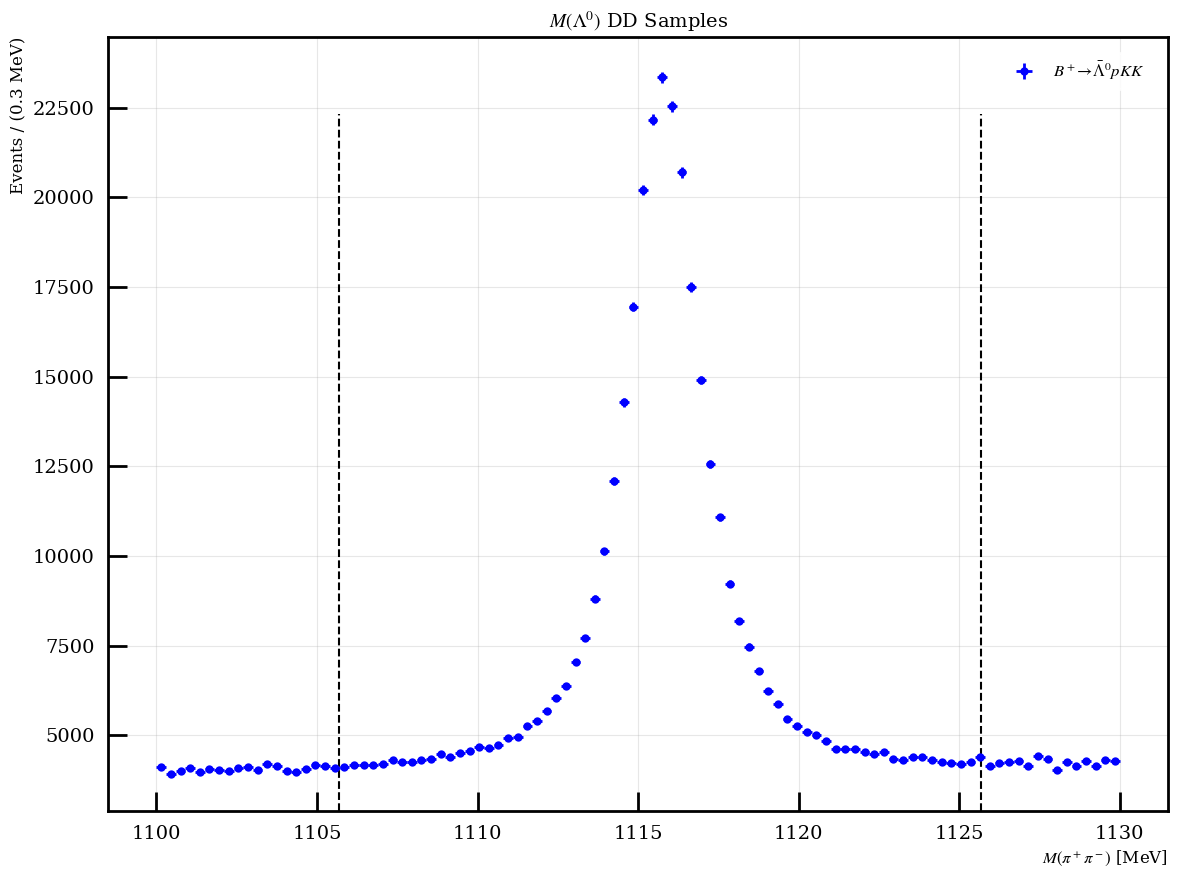

In [7]:
# Check if Lambda mass (L0_MM) field exists in the data
print("Checking for L0_MM field in data:", "L0_MM" in data.fields)

# Print all available fields to find the Lambda mass variable
print("All fields in data:", list(data.fields))

# Print Lambda mass statistics
if "L0_MM" in data.fields:
    lambda_mass = ak.to_numpy(data["L0_MM"])
    print("\nLambda Mass statistics:")
    print(f"Mean: {np.mean(lambda_mass):.2f} MeV")
    print(f"Median: {np.median(lambda_mass):.2f} MeV")
    print(f"Min: {np.min(lambda_mass):.2f} MeV")
    print(f"Max: {np.max(lambda_mass):.2f} MeV")
    print(f"Standard deviation: {np.std(lambda_mass):.2f} MeV")
    print(f"Number of events: {len(lambda_mass)}")
else:
    print("\nWarning: Lambda mass field (L0_MM) not found in data")
    
# Create a figure for plotting Lambda mass
if "L0_MM" in data.fields:
    fig, ax = plt.subplots()
    
    # Define Lambda mass range and bins
    lambda_mass_pdg = 1115.683  # MeV/c²
    lambda_mass_min = 1100  # MeV
    lambda_mass_max = 1130  # MeV
    lambda_bins = 100  # Number of bins
    
    # Define histogram style parameters for Lambda
    lambda_histstyle = {
        'bins': lambda_bins,
        'range': (lambda_mass_min, lambda_mass_max),
    }
    
    # Plot Lambda mass
    lambda_data = ak.to_numpy(data["L0_MM"])
    ax, lambda_hist, lambda_errors = plot_data(
        ax=ax,
        data=lambda_data,
        label=r"$B^+\to \bar{\Lambda}^0pKK$",
        histstyle=lambda_histstyle,
        color="blue",
        errorbar=True,
        mkstyle='o'
    )
    
    # Add labels and title for Lambda plot
    ax.set_xlabel(r"$M(\pi^+\pi^-)$ [MeV]", fontsize=12)
    ax.set_ylabel(r"Events / (0.3 MeV)", fontsize=12)
    ax.set_title(r"$M(\Lambda^{0})$ DD Samples", fontsize=14)
    
    # Add a legend for Lambda plot
    ax.legend(fontsize=12)
    
    # Show grid for Lambda plot
    plt.grid(True, alpha=0.3)
    
    # Define Lambda mass region boundaries (PDG value ± 10 MeV)
    lambda_window = 10  # MeV
    lambda_lower_bound = lambda_mass_pdg - lambda_window
    lambda_upper_bound = lambda_mass_pdg + lambda_window
    
    # Add dashed vertical lines at the boundary of the Lambda mass region
    ax.axvline(x=lambda_lower_bound, ymin=0, ymax=0.9, color='black', linestyle='--', 
               linewidth=1.5)
    ax.axvline(x=lambda_upper_bound, ymin=0, ymax=0.9, color='black', linestyle='--', 
               linewidth=1.5)
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Save the Lambda plot
    # plt.savefig("Lambda_mass_distribution.png", dpi=300, bbox_inches="tight")

In [8]:
# # Check if Lambda mass (L0_MM) field exists in the data
# print("Checking for L0_MM field in data:", "L0_MM" in data.fields)

# # Print all available fields to find the Lambda mass variable
# print("All fields in data:", list(data.fields))

    
# # Create a figure for plotting Lambda mass
# if "L0_FDCHI2_OWNPV" in data.fields:
#     fig, ax = plt.subplots()
    
#     # Define Lambda mass range and bins
#     lambda_bins = 1000  # Number of bins
    
#     # Define histogram style parameters for Lambda
#     lambda_histstyle = {
#         'bins': lambda_bins,
#         'range': (0, 10000),
#     }
    
#     # Plot Lambda mass
#     lambda_data = ak.to_numpy(data["L0_FDCHI2_OWNPV"])
#     ax, lambda_hist, lambda_errors = plot_data(
#         ax=ax,
#         data=lambda_data,
#         label=r"$B^+\to \bar{\Lambda}^0pKK$",
#         histstyle=lambda_histstyle,
#         color="blue",
#         errorbar=True,
#         mkstyle='o'
#     )
    
#     # Add labels and title for Lambda plot
#     ax.set_xlabel(r"$\Lambda^{0} \text{FD}_{\chi^2}$", fontsize=12)
#     ax.set_ylabel(r"Events)", fontsize=12)
#     ax.set_title(r"$\Lambda^{0}$ DD Samples", fontsize=14)
    
#     # Add a legend for Lambda plot
#     ax.legend(fontsize=12)
#     # log scale on y-axis
#     ax.set_yscale('log')
        
#     plt.tight_layout()
#     plt.show()
    
#     # Optional: Save the Lambda plot
#     # plt.savefig("Lambda_mass_distribution.png", dpi=300, bbox_inches="tight")

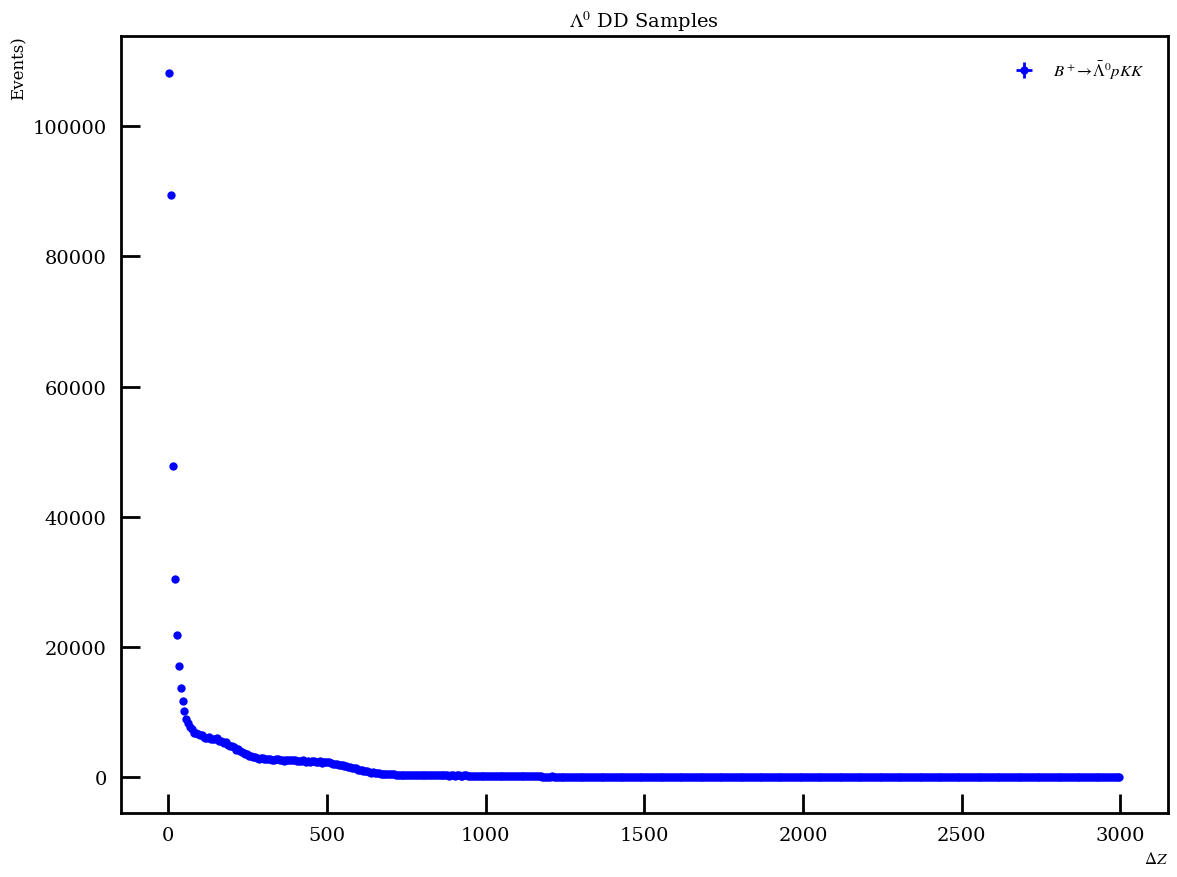

In [9]:
fig, ax = plt.subplots()

# Define histogram style parameters for Lambda
lambda_histstyle = {
    'bins': 500,
    'range': (0, 3000),
}

# Plot Lambda mass
ax, lambda_hist, lambda_errors = plot_data(
    ax=ax,
    data=Delta_Z,
    label=r"$B^+\to \bar{\Lambda}^0pKK$",
    histstyle=lambda_histstyle,
    color="blue",
    errorbar=True,
    mkstyle='o'
)

# Add labels and title for Lambda plot
ax.set_xlabel(r"$\Delta Z$", fontsize=12)
ax.set_ylabel(r"Events)", fontsize=12)
ax.set_title(r"$\Lambda^{0}$ DD Samples", fontsize=14)

# Add a legend for Lambda plot
ax.legend(fontsize=12)
    
plt.tight_layout()
plt.show()



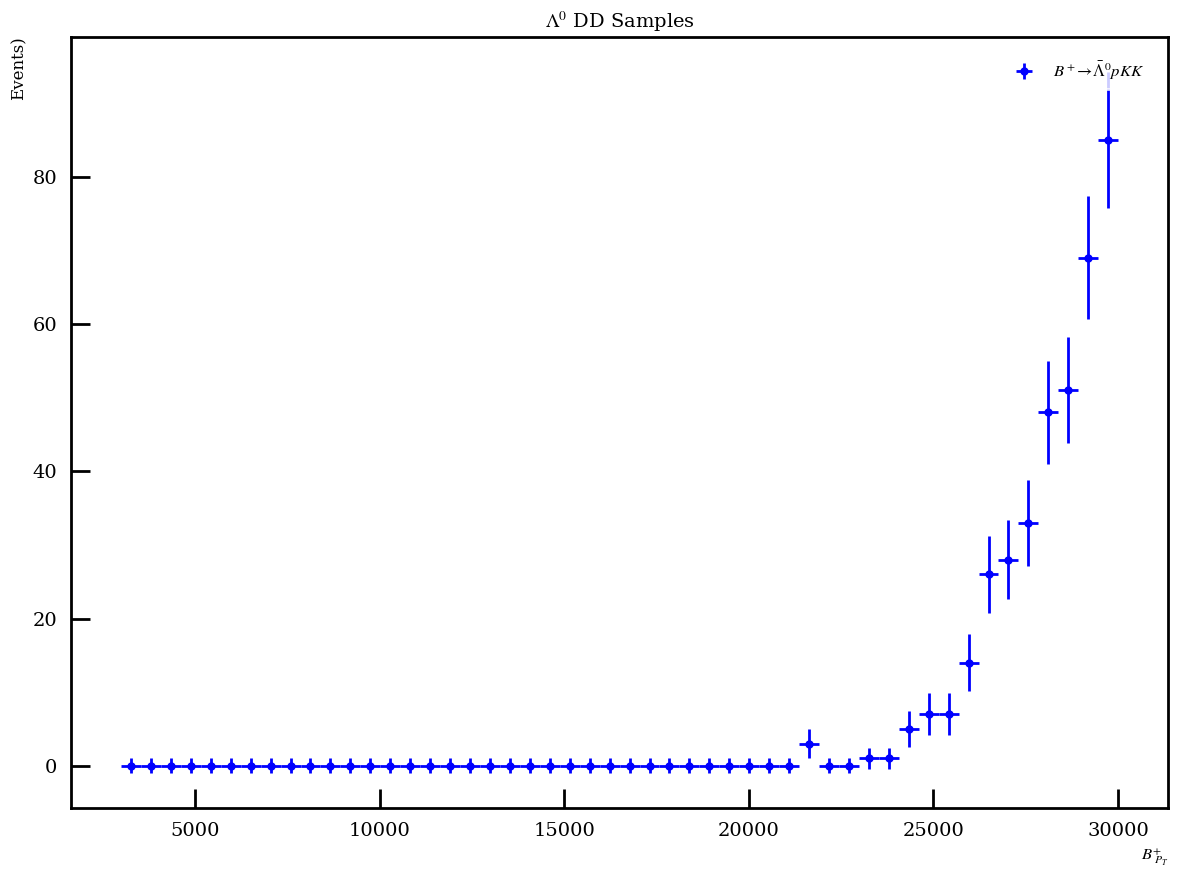

In [10]:
fig, ax = plt.subplots()

# Define histogram style parameters for Lambda
lambda_histstyle = {
    'bins': 50,
    'range': (3000, 30000),
}

# Plot Lambda mass
ax, lambda_hist, lambda_errors = plot_data(
    ax=ax,
    data=data['Bu_P'],
    label=r"$B^+\to \bar{\Lambda}^0pKK$",
    histstyle=lambda_histstyle,
    color="blue",
    errorbar=True,
    mkstyle='o'
)

# Add labels and title for Lambda plot
ax.set_xlabel(r"$B^{+}_{~P_{T}}$", fontsize=12)
ax.set_ylabel(r"Events)", fontsize=12)
ax.set_title(r"$\Lambda^{0}$ DD Samples", fontsize=14)

# Add a legend for Lambda plot
ax.legend(fontsize=12)
    
plt.tight_layout()
plt.show()



In [11]:
# Define ccbar_M as the invariant mass of p,L0 and h2
ccbar_M = np.sqrt(
        (data["L0_PE"] + data["p_PE"] + data["h2_PE"])**2 -
        (data["L0_PX"] + data["p_PX"] + data["h2_PX"])**2 -
        (data["L0_PY"] + data["p_PY"] + data["h2_PY"])**2 -
        (data["L0_PZ"] + data["p_PZ"] + data["h2_PZ"])**2
    )

In [12]:
def select(data, truth=False):
    # Ensure ccbar_M is an Awkward Array
    ccbar_M = ak.values_astype(
        np.sqrt(
            (data["L0_PE"] + data["p_PE"] + data["h2_PE"])**2 -
            (data["L0_PX"] + data["p_PX"] + data["h2_PX"])**2 -
            (data["L0_PY"] + data["p_PY"] + data["h2_PY"])**2 -
            (data["L0_PZ"] + data["p_PZ"] + data["h2_PZ"])**2
        ),
        np.float64,  # Convert explicitly to float64
    )

    # Initial selection
    selection = (data["Lp_MC15TuneV1_ProbNNp"] < 0.2) & (np.abs(data["L0_M"] - 1115.6) < 6) & (data["Bu_PT"] > 3000) 

    # Apply additional selections (avoiding in-place operations `&=`)
    selection = selection & (np.abs(ccbar_M - 3096.9) < 30)
    # selection = selection & (np.abs(data["Bu_DTFL0_M"] - 5279) < 30)
    # selection = selection & ((data["L0_ENDVERTEX_Z"] - data["Bu_ENDVERTEX_Z"]) > 20) & (data["L0_FDCHI2_ORIVX"] > 45)
    # selection = selection & ((data["p_MC15TuneV1_ProbNNp"] * data["h1_MC15TuneV1_ProbNNk"] * data["h2_MC15TuneV1_ProbNNk"]) > 0.5)

    return data[selection]

# Apply selection
data_selection = select(data)



Lambda Mass statistics:
Mean: 1115.57 MeV
Median: 1115.60 MeV
Min: 1108.61 MeV
Max: 1121.94 MeV
Standard deviation: 3.22 MeV
Number of events: 1139


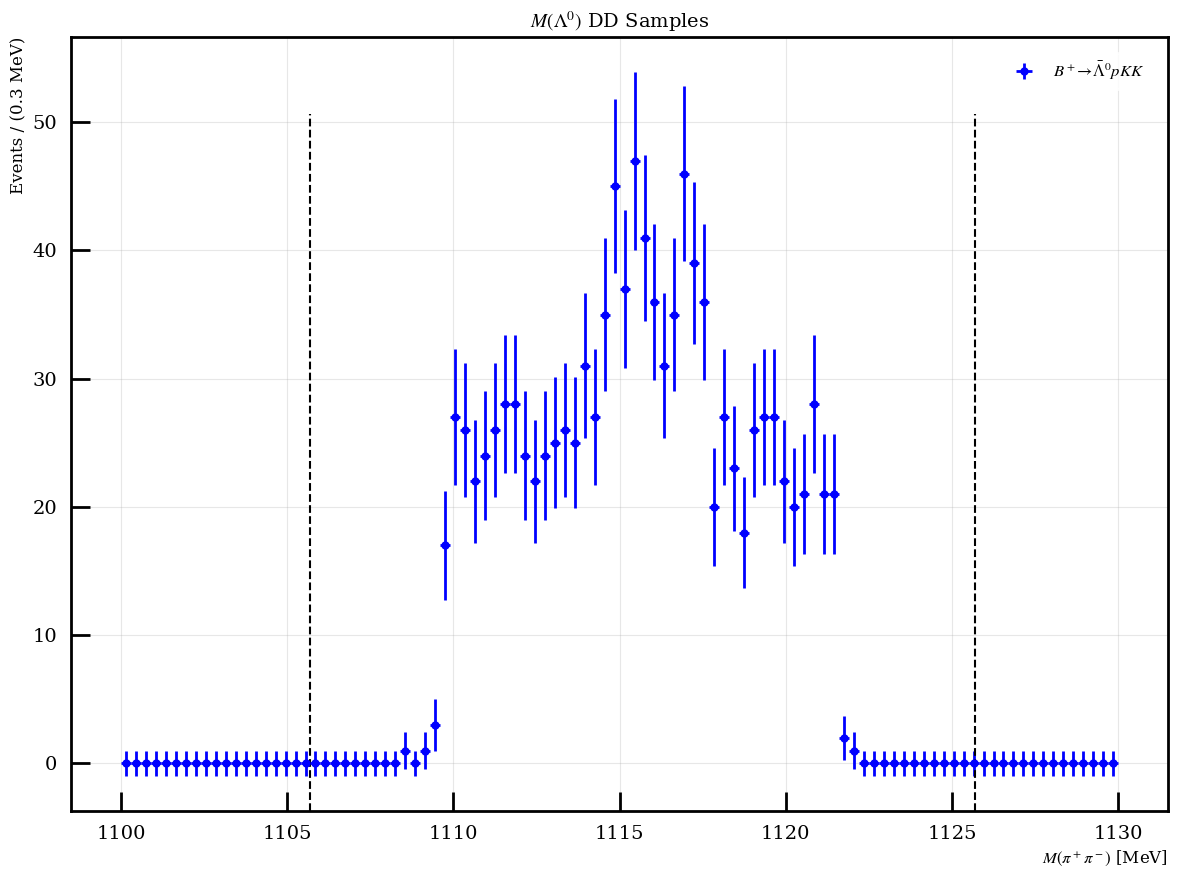

In [13]:

# Print Lambda mass statistics
if "L0_MM" in data_selection.fields:
    lambda_mass = ak.to_numpy(data_selection["L0_MM"])
    print("\nLambda Mass statistics:")
    print(f"Mean: {np.mean(lambda_mass):.2f} MeV")
    print(f"Median: {np.median(lambda_mass):.2f} MeV")
    print(f"Min: {np.min(lambda_mass):.2f} MeV")
    print(f"Max: {np.max(lambda_mass):.2f} MeV")
    print(f"Standard deviation: {np.std(lambda_mass):.2f} MeV")
    print(f"Number of events: {len(lambda_mass)}")
else:
    print("\nWarning: Lambda mass field (L0_MM) not found in data")
    
# Create a figure for plotting Lambda mass
if "L0_MM" in data_selection.fields:
    fig, ax = plt.subplots()
    
    # Define Lambda mass range and bins
    lambda_mass_pdg = 1115.683  # MeV/c²
    lambda_mass_min = 1100  # MeV
    lambda_mass_max = 1130  # MeV
    lambda_bins = 100  # Number of bins
    
    # Define histogram style parameters for Lambda
    lambda_histstyle = {
        'bins': lambda_bins,
        'range': (lambda_mass_min, lambda_mass_max),
    }
    
    # Plot Lambda mass
    lambda_data = ak.to_numpy(data_selection["L0_MM"])
    ax, lambda_hist, lambda_errors = plot_data(
        ax=ax,
        data=lambda_data,
        label=r"$B^+\to \bar{\Lambda}^0pKK$",
        histstyle=lambda_histstyle,
        color="blue",
        errorbar=True,
        mkstyle='o'
    )
    
    # Add labels and title for Lambda plot
    ax.set_xlabel(r"$M(\pi^+\pi^-)$ [MeV]", fontsize=12)
    ax.set_ylabel(r"Events / (0.3 MeV)", fontsize=12)
    ax.set_title(r"$M(\Lambda^{0})$ DD Samples", fontsize=14)
    
    # Add a legend for Lambda plot
    ax.legend(fontsize=12)
    
    # Show grid for Lambda plot
    plt.grid(True, alpha=0.3)
    
    # Define Lambda mass region boundaries (PDG value ± 10 MeV)
    lambda_window = 10  # MeV
    lambda_lower_bound = lambda_mass_pdg - lambda_window
    lambda_upper_bound = lambda_mass_pdg + lambda_window
    
    # Add dashed vertical lines at the boundary of the Lambda mass region
    ax.axvline(x=lambda_lower_bound, ymin=0, ymax=0.9, color='black', linestyle='--', 
               linewidth=1.5)
    ax.axvline(x=lambda_upper_bound, ymin=0, ymax=0.9, color='black', linestyle='--', 
               linewidth=1.5)
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Save the Lambda plot
    # plt.savefig("Lambda_mass_distribution.png", dpi=300, bbox_inches="tight")

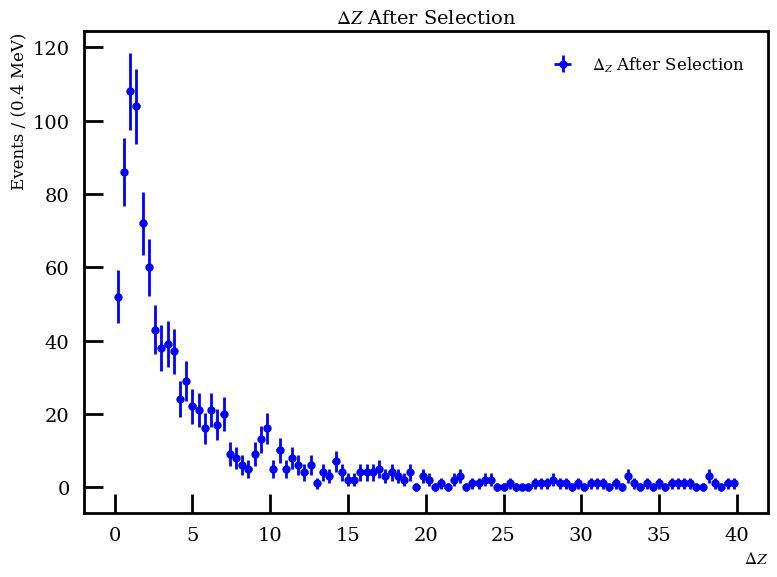

In [14]:
# Apply selection to data
selected_data = select(data)

# Recompute Delta_Z and its error after selection
Delta_Z_selected = selected_data["L0_ENDVERTEX_Z"] - selected_data["Bu_ENDVERTEX_Z"]
Delta_Z_ERR_selected = np.sqrt(
    np.square(selected_data["Bu_ENDVERTEX_ZERR"]) + np.square(selected_data["L0_ENDVERTEX_ZERR"])
)

# Compute delta_z after selection
delta_z_selected = np.divide(Delta_Z_selected, Delta_Z_ERR_selected)

# Define histogram style parameters
delta_z_histstyle = {
    'bins': 100,
    'range': (0, 40),
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot delta_z using the same plot structure
ax, delta_z_hist, delta_z_errors = plot_data(
    ax=ax,
    data=delta_z_selected,
    label=r"$\Delta_Z$ After Selection",
    histstyle=delta_z_histstyle,
    color="blue",
    errorbar=True,
    mkstyle='o'
)

# Add labels and title
ax.set_xlabel(r"$\Delta Z$", fontsize=12)
ax.set_ylabel(r"Events / (0.4 MeV)", fontsize=12)
ax.set_title(r"$\Delta Z$ After Selection", fontsize=14)

# Add legend
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [15]:
# # Apply selection to data
# selected_data = select(data)

# # Recompute Delta_Z and its error after selection
# PT_selected = selected_data["BU_PT"]
# PT_ERR_selected = np.sqrt(
#     np.square(selected_data["Bu_ENDVERTEX_ZERR"]) + np.square(selected_data["L0_ENDVERTEX_ZERR"])
# )

# # Compute delta_z after selection
# pt_histstyle = np.divide(Delta_Z_selected, Delta_Z_ERR_selected)

# # Define histogram style parameters
# pt_histstyle = {
#     'bins': 100,
#     'range': (3000, 30000),
# }

# # Create figure and axis
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plot delta_z using the same plot structure
# ax, delta_z_hist, delta_z_errors = plot_data(
#     ax=ax,
#     data=pt_histstyle,
#     label=r"$\Delta_Z$ After Selection",
#     histstyle=pt_histstyle,
#     color="blue",
#     errorbar=True,
#     mkstyle='o'
# )

# # Add labels and title
# ax.set_xlabel(r"$\Delta Z$", fontsize=12)
# ax.set_ylabel(r"Events / (0.4 MeV)", fontsize=12)
# ax.set_title(r"$\Delta Z$ After Selection", fontsize=14)

# # Add legend
# ax.legend(fontsize=12)

# plt.tight_layout()
# plt.show()


In [16]:
# def select(data, truth=False):
#     # Ensure ccbar_M is an Awkward Array
#     ccbar_M = ak.values_astype(
#         np.sqrt(
#             (data["L0_PE"] + data["p_PE"] + data["h2_PE"])**2 -
#             (data["L0_PX"] + data["p_PX"] + data["h2_PX"])**2 -
#             (data["L0_PY"] + data["p_PY"] + data["h2_PY"])**2 -
#             (data["L0_PZ"] + data["p_PZ"] + data["h2_PZ"])**2
#         ),
#         np.float64,  # Convert explicitly to float64
#     )

#     # Initial selection
#     selection = (data["Lp_MC15TuneV1_ProbNNp"] > 0.2) & (np.abs(data["L0_M"] - 1115.6) < 6) & (data["Bu_PT"] > 3000) 

#     # Apply additional selections (avoiding in-place operations `&=`)
#     # selection = selection & (np.abs(ccbar_M - 3096.9) < 30)
#     # selection = selection & (np.abs(data["Bu_DTFL0_M"] - 5279) < 30)
#     selection = selection & ((data["L0_ENDVERTEX_Z"] - data["Bu_ENDVERTEX_Z"]) > 20) & (data["L0_FDCHI2_ORIVX"] > 35)
#     selection = selection & ((data["p_MC15TuneV1_ProbNNp"] * data["h1_MC15TuneV1_ProbNNk"] * data["h2_MC15TuneV1_ProbNNk"]) > 0.2)

#     return data[selection]

# # Apply selection
# data_selection = select(data)


In [17]:
# from utils.fit import load_mc_fit_params
# # Import the modified function above instead of the original
# from utils.fit import fit_data_with_mc_constraints

# output_dir = "output_['DD']"

# # Load previously computed MC parameters
# mc_params_path = f"{output_dir}/b_mass_shape_params_MC_DoubleGauss_Pol2.json"
# mc_params = load_mc_fit_params(mc_params_path)

# # Print mc_params to verify the structure
# print("MC parameters keys:", mc_params.keys())
# print("Model type:", mc_params["model"])
# print(f"MC mean: {mc_params['mean']['value']:.2f} MeV/c²")

# # Now use these parameters with  data
# fit_results = fit_data_with_mc_constraints(
#     data_selection,
#     mass_branch='Bu_MM',
#     mc_params=mc_params,
    
#     output_dir=output_dir
# )

# # Print a comparison to verify the correction worked
# print("\nFit results summary:")
# print(f"Mean: {fit_results['mean']['value']:.2f} ± {fit_results['mean']['error']:.2f} MeV/c²")
# print(f"Signal yield: {fit_results['signal_yield']['value']:.0f} ± {fit_results['signal_yield']['error']:.0f}")
# print(f"Significance: {fit_results['signal_significance']:.1f}σ")
# print(f"χ²/ndf: {fit_results['chi2_ndf']:.3f}")

In [18]:
def select(data, track_type='LL'):
    """
    Apply selection cuts to B+ → Λ0 h1 h2 samples incrementally
    
    Parameters:
    -----------
    data : awkward.Array
        Events data
    track_type : str
        Track type, either 'LL' (Long-Long) or 'DD' (Downstream-Downstream)
    
    Returns:
    --------
    awkward.Array
        Selected events after applying all cuts
    """
    # Keep track of initial count for reporting
    initial_count = len(data)
    
    # Apply cuts one at a time, printing progress if desired
    print(f"Initial events: {initial_count}")
    
    # ===== p (Proton) Cuts =====
    data = data[data['p_MC15TuneV1_ProbNNp'] > 0.05]
    print(f"After proton prob cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # ===== Λ0 Cuts =====
    # Delta Z cut (difference between Lambda decay vertex and primary vertex)
    data = data[(data['L0_ENDVERTEX_Z'] - data['L0_OWNPV_Z']) > 20]
    print(f"After delta Z cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # Lambda flight distance chi2
    try:
        data = data[data['L0_FDCHI2_OWNPV'] > 45]
    except:
        # Try alternative field name
        data = data[data['L0_FDCHI2_ORIVX'] > 45]
    print(f"After fd chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # Lambda mass window
    data = data[(data['L0_M'] - 1115.6 < 6) & (data['L0_M'] - 1115.6 > -6)]
    print(f"After lambda mass cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # Lambda proton ProbNN
    data = data[data['Lp_MC15TuneV1_ProbNNp'] > 0.2]
    print(f"After lambda proton prob cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # ===== h1 and h2 (Kaon) Cuts =====
    # KK product
    try:
        data = data[(data['h1_ProbNNk'] * data['h2_ProbNNk']) > 0.04]
    except:
        # Try alternative field names
        data = data[(data['h1_MC15TuneV1_ProbNNk'] * data['h2_MC15TuneV1_ProbNNk']) > 0.04]
    print(f"After KK product cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # ===== B⁺ Cuts =====
    # B PT cut
    data = data[data['Bu_PT'] > 3000]
    print(f"After B PT cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # DTF chi2 cut - only apply if the field exists
    try:
        data = data[data['Bu_DTF_chi2'] < 30]
        print(f"After DTF chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    except:
        print("Skipping DTF chi2 cut (field not found)")
    
    # Impact Parameter Chi2 - only apply if the field exists
    try:
        data = data[data['Bu_IPCHI2_OWNPV'] < 10]
        print(f"After IP chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    except:
        print("Skipping IP chi2 cut (field not found)")
    
    # Flight Distance Chi2 - only apply if the field exists
    try:
        data = data[data['Bu_FDCHI2_OWNPV'] > 175]
        print(f"After B FD chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    except:
        print("Skipping B FD chi2 cut (field not found)")
    
    print(f"Final selected events: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    return data

In [19]:
data_selection = select(data, track_type='LL')  # or 'DD' for Downstream-Downstream

Initial events: 713632
After proton prob cut: 713632/713632 (100.00%)
After delta Z cut: 629470/713632 (88.21%)
After fd chi2 cut: 572658/713632 (80.25%)
After lambda mass cut: 328178/713632 (45.99%)
After lambda proton prob cut: 262305/713632 (36.76%)
After KK product cut: 262305/713632 (36.76%)
After B PT cut: 262305/713632 (36.76%)
After DTF chi2 cut: 262305/713632 (36.76%)
After IP chi2 cut: 262305/713632 (36.76%)
After B FD chi2 cut: 262305/713632 (36.76%)
Final selected events: 262305/713632 (36.76%)


In [20]:
from utils.fit import load_mc_fit_params
# Import the modified function above instead of the original
from utils.fit import fit_data_with_mc_constraints

output_dir = "output_['LL']"

# Load previously computed MC parameters
mc_params_path = f"{output_dir}/b_mass_shape_params_MC_DoubleGauss_Pol2.json"
mc_params = load_mc_fit_params(mc_params_path)

# Print mc_params to verify the structure
print("MC parameters keys:", mc_params.keys())
print("Model type:", mc_params["model"])
print(f"MC mean: {mc_params['mean']['value']:.2f} MeV/c²")

# Now use these parameters with  data
fit_results = fit_data_with_mc_constraints(
    data_selection,
    mass_branch='Bu_MM',
    mc_params=mc_params,
    
    output_dir=output_dir
)

# Print a comparison to verify the correction worked
print("\nFit results summary:")
print(f"Mean: {fit_results['mean']['value']:.2f} ± {fit_results['mean']['error']:.2f} MeV/c²")
print(f"Signal yield: {fit_results['signal_yield']['value']:.0f} ± {fit_results['signal_yield']['error']:.0f}")
print(f"Significance: {fit_results['signal_significance']:.1f}σ")
print(f"χ²/ndf: {fit_results['chi2_ndf']:.3f}")

Welcome to JupyROOT 6.28/00
Successfully loaded MC parameters from output_['LL']/b_mass_shape_params_MC_DoubleGauss_Pol2.json
MC parameters keys: dict_keys(['model', 'mean', 'sigma1', 'sigma2', 'fraction', 'effective_sigma', 'signal_yield', 'background_yield', 'chi2_ndf', 'events'])
Model type: double_gaussian_poly2
MC mean: 5280.73 MeV/c²
Fitting real data using Double Gaussian + Poly2 model with MC constraints
Number of events: 262305
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0           1.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     2 c1           1.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     3 c2           1.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     4 frac         5.55324e-01  5.55324e-02    2.77662e-01  8.32986e-01
     5 mean         5.28073e+03  1.00000e+00    5.27573e+03  5.28573e+03
     6 nbkg

Info in <TCanvas::Print>: pdf file output_['LL']/b_mass_fit_RealData_DoubleGauss_Pol2.pdf has been created
